In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('https://raw.githubusercontent.com/italia/covid19-opendata-vaccini/master/dati/consegne-vaccini-latest.csv')
df

,area,fornitore,numero_dosi,data_consegna,codice_NUTS1,codice_NUTS2,codice_regione_ISTAT,nome_area
0,ABR,Pfizer/BioNTech,135,2020-12-27,ITF,ITF1,13,Abruzzo
1,ABR,Pfizer/BioNTech,7800,2020-12-30,ITF,ITF1,13,Abruzzo
2,ABR,Pfizer/BioNTech,3900,2021-01-05,ITF,ITF1,13,Abruzzo
3,ABR,Pfizer/BioNTech,3900,2021-01-07,ITF,ITF1,13,Abruzzo
4,ABR,Pfizer/BioNTech,3900,2021-01-11,ITF,ITF1,13,Abruzzo
...,...,...,...,...,...,...,...,...
5278,VEN,Moderna,-1200,2021-10-11,ITH,ITH3,5,Veneto
5279,VEN,Moderna,1,2021-10-13,ITH,ITH3,5,Veneto
5280,VEN,Moderna,8,2021-10-14,ITH,ITH3,5,Veneto
5281,VEN,Pfizer/BioNTech,4,2021-10-15,ITH,ITH3,5,Veneto


In [34]:
len(df)

5283

In [ ]:
stringa = input()

Abruzzo


In [ ]:
df[df['nome_area']==stringa].count()['area']

154

In [ ]:
if stringa in df.values:
  print(df[df['nome_area']==stringa].count()['area'])
else:
  print('valore non trovato')

154


In [ ]:
df[df['nome_area']==stringa]['numero_dosi'].sum()

2267252

In [ ]:
df.groupby('fornitore')['numero_dosi'].sum()

fornitore
Janssen                     1846104
Moderna                    15235940
Pfizer/BioNTech            71327408
Vaxzevria (AstraZeneca)    11544591
Name: numero_dosi, dtype: int64

In [ ]:
df[df['nome_area']==stringa].groupby('fornitore',as_index=False).sum().sort_values('numero_dosi',ascending=False)[['fornitore','numero_dosi']]

,fornitore,numero_dosi
2,Pfizer/BioNTech,1575702
1,Moderna,357200
3,Vaxzevria (AstraZeneca),298450
0,Janssen,35900


<BarContainer object of 4 artists>

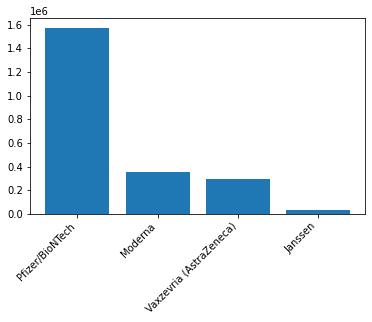

In [ ]:
data = df[df['nome_area']==stringa].groupby('fornitore',as_index=False).sum().sort_values('numero_dosi',ascending=False)[['fornitore','numero_dosi']]

fig = plt.figure()
ax = plt.axes()

fig.autofmt_xdate(rotation=45)
ax.bar(data['fornitore'],data['numero_dosi'])

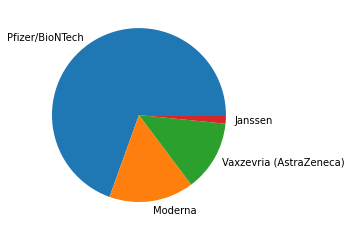

In [ ]:
fig = plt.figure()
ax = plt.axes()

ax.pie(data['numero_dosi'],labels=data['fornitore'])
plt.show()

In [ ]:
!pip install squarify
import squarify as sqrfy

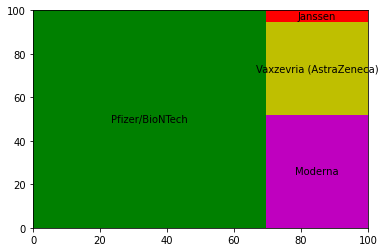

In [ ]:
fig = plt.figure()
ax = plt.axes()

sqrfy.plot(data['numero_dosi'],label=data['fornitore'],color=['g','m','y','r'])

In [ ]:
df.groupby('nome_area')['numero_dosi'].sum().sort_values(ascending=False).head(3)

nome_area
Lombardia    17274689
Lazio        10332809
Campania      9179718
Name: numero_dosi, dtype: int64

In [44]:
df.groupby('nome_area')['numero_dosi'].sum()[df.groupby('nome_area')['numero_dosi'].sum()<df.groupby('nome_area')['numero_dosi'].sum().mean()].index

Index(['Abruzzo', 'Basilicata', 'Calabria', 'Friuli-Venezia Giulia', 'Liguria',
       'Marche', 'Molise', 'Provincia Autonoma Bolzano / Bozen',
       'Provincia Autonoma Trento', 'Sardegna', 'Umbria',
       'Valle d'Aosta / Vallée d'Aoste'],
      dtype='object', name='nome_area')

In [47]:
df.groupby('nome_area')['numero_dosi'].sum().mean()

4759716.333333333

In [ ]:
df.groupby('nome_area',as_index=False).sum() 

,nome_area,numero_dosi,codice_regione_ISTAT
0,Abruzzo,2267252,2002
1,Basilicata,936665,1955
2,Calabria,2902284,3132
3,Campania,9179718,6480
4,Emilia-Romagna,7329514,1680
5,Friuli-Venezia Giulia,2031903,3300
6,Lazio,10332809,10668
7,Liguria,2547002,1708
8,Lombardia,17274689,792
9,Marche,2507456,1309


visualizzare il grafico delle consegne dei vaccini in Lombardia e nel Lazio. Visualizzare solo i dati delle
consegne avvenute negli utlimi sei mesi. Fare in modo che la data sia determinata in modo automatico

In [19]:
df['data_consegna'] = pd.to_datetime(df['data_consegna'])

In [17]:
from datetime import datetime
from dateutil.relativedelta import relativedelta

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


<BarContainer object of 2 artists>

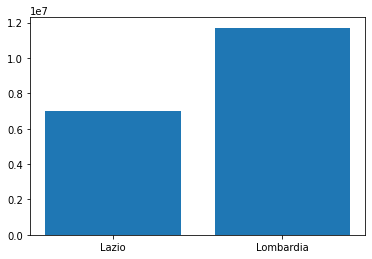

In [43]:
past = datetime.now() - relativedelta(months=6)
present = datetime.now()

data = df[(df['nome_area']=='Lombardia')|(df['nome_area']=='Lazio')][(df['data_consegna'].dt.date <= datetime.date(present)) & (df['data_consegna'].dt.date >= datetime.date(past))]
data = data.groupby('nome_area').sum()

fig = plt.figure()
ax = plt.axes()

ax.bar(data.index,data['numero_dosi'])